# Who is buying the featured yogurt?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Yogurt = pd.read_csv("./.kaggle_data/Rdatasets/Yogurt.csv").drop("Unnamed: 0",axis=1)
brands = ['dannon', 'hiland', 'weight', 'yoplait']
brands_ordered = [x[0] for x in sorted([[brand,Yogurt["price." + brand].mean()] 
                                        for brand in brands],key = lambda x : x[1])]

In [3]:
Yogurt.head(n=10)

,id,feat.yoplait,feat.dannon,feat.hiland,feat.weight,price.yoplait,price.dannon,price.hiland,price.weight,choice
0,1,0,0,0,0,10.8,8.1,6.1,7.9,weight
1,1,0,0,0,0,10.8,9.8,6.4,7.5,dannon
2,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
3,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
4,1,0,0,0,0,12.5,9.8,4.9,7.9,dannon
5,1,0,0,0,0,10.8,9.2,5.0,7.9,dannon
6,1,0,0,0,0,10.3,8.1,4.9,7.9,dannon
7,1,0,0,0,0,10.8,8.6,5.4,7.9,weight
8,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait
9,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait


### Description of data set

The CSV file does not come with a description, but everything seems pretty self explanitory. Hopefully the following is correct......

- id identifies a customer. There are 100 customers in the data set.
- feat.brand tells you if the brand of yougurt is being featured or not, i.e is it in a special location?
- price.brand tells you the current price of the yogurt
- choice tells you what was purchased.

In [4]:
def filter_id(n,df): return df[df["id"] == n]
def filter_choice(yogurt,df): return df[df["choice"] == yogurt]
def filter_feature(yogurt,feature,df): return df[df["feat." + yogurt] == feature]

In [5]:
def yogurt_filter_id_choice_feature(n,yogurt,feature):
    return filter_feature(yogurt,feature,filter_choice(yogurt,filter_id(n,Yogurt)))
def yogurt_filter_id_choice_feature_bar(n,feature):
    return np.array([yogurt_filter_id_choice_feature(n,yogurt,feature).shape[0] for yogurt in brands_ordered])

In [6]:
#the random 0.0000001 is to deal with customers who don't purchase any units of a specific brand
def emperical_entropy(purchase_freq):
    x = ((purchase_freq / purchase_freq.sum()) + 0.0000001)
    return - (x * np.log2(x)).sum()

In [7]:
entropy_id_pairs = [(emperical_entropy(yogurt_filter_id_choice_feature_bar(n+1,0) + 
                                       yogurt_filter_id_choice_feature_bar(n+1,1)),n+1) 
                    for n in range(100)]


In [8]:
entropy_id_pairs_sorted = sorted(entropy_id_pairs, key = lambda x: x[0])
def ids_ordered(n): return entropy_id_pairs_sorted[n][1]

In [9]:
def customer_to_grid(n): return [(i,j) for i in range(10) for j in range(10)][n]

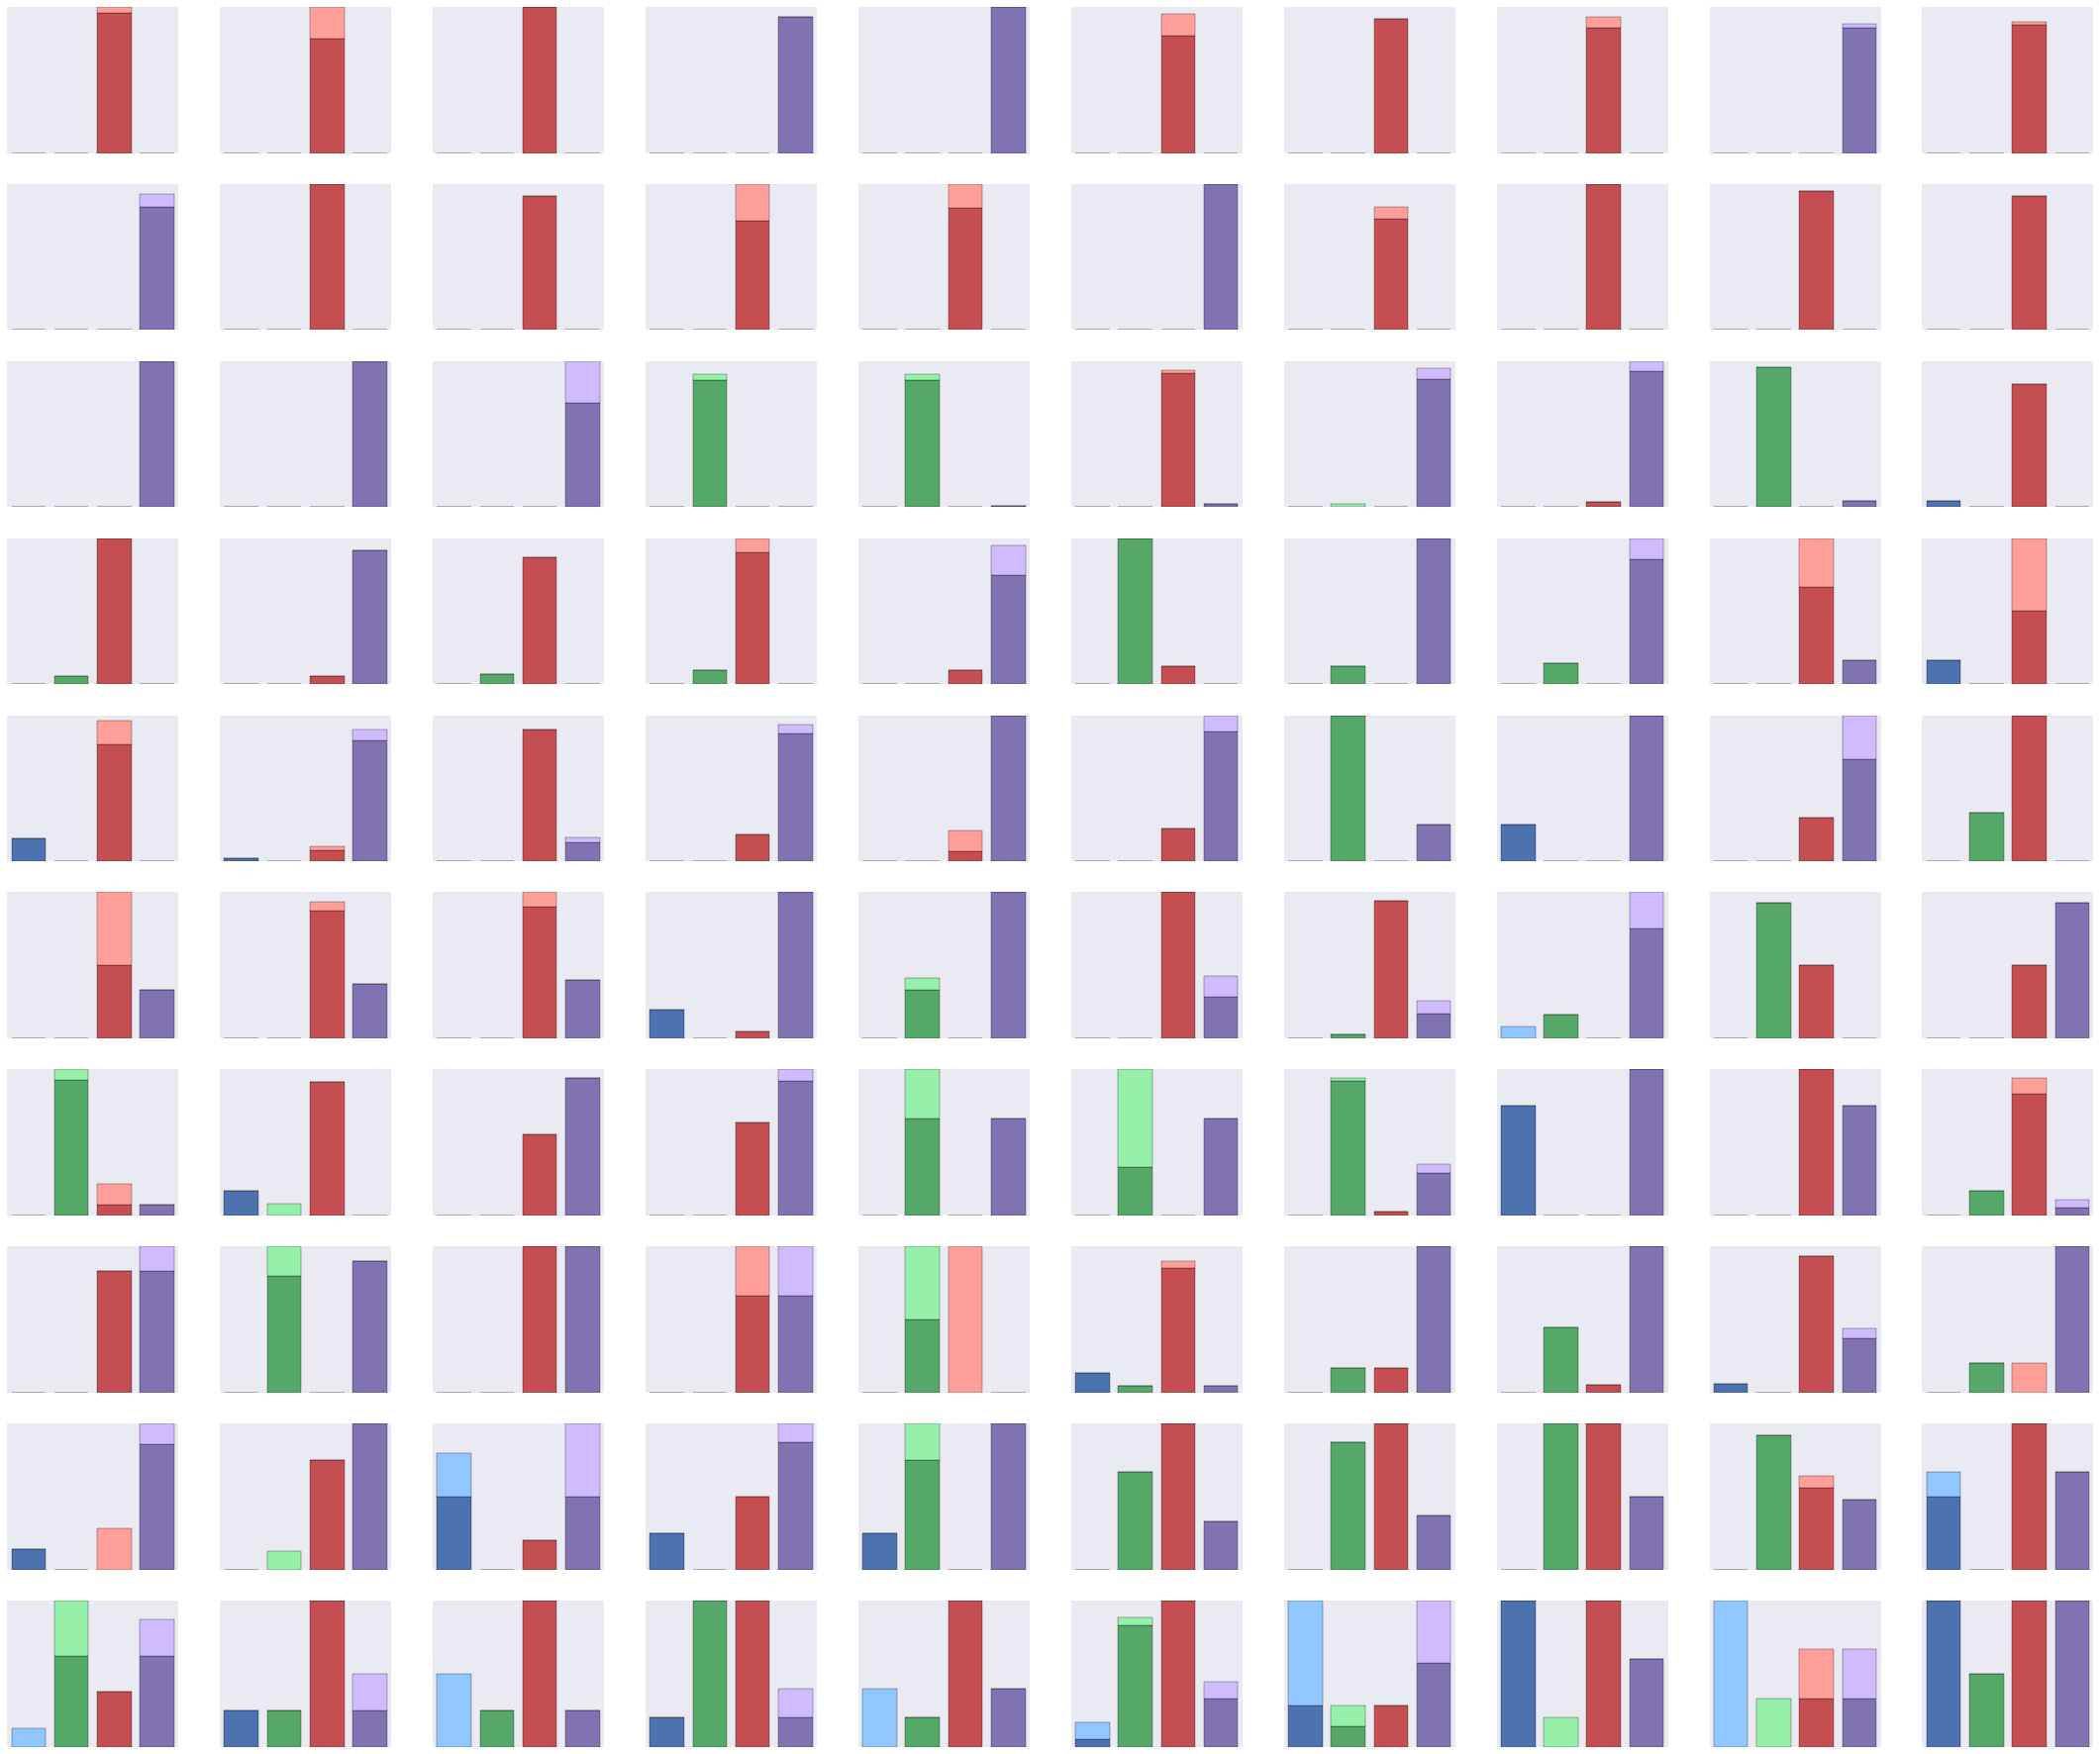

In [13]:
xticks = [0,1,2,3]
feat_colors = sns.color_palette("pastel")
not_feat_colors = sns.color_palette()

f, ax = plt.subplots(10,10,figsize=(30, 25))
f.tight_layout()

for n in range(100):
    i = customer_to_grid(n)[0]
    j = customer_to_grid(n)[1]
    ax[i,j].bar(xticks,yogurt_filter_id_choice_feature_bar(ids_ordered(n),0),align='center',color=not_feat_colors)
    ax[i,j].bar(xticks,yogurt_filter_id_choice_feature_bar(ids_ordered(n),1),align='center',
                bottom=yogurt_filter_id_choice_feature_bar(ids_ordered(n),0),color=feat_colors)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
plt.show()

These bar plots show the number of times each customer puchases each type of yogurt. The barplots are normalized. This is necessary because some customers purchase a lot more yogurt than others. The customers are ordered by the entropy of their emperical purchasing distrubution. The colors are

- blue = hiland.    average price = 5.36
- green = weight.   average price = 7.95
- red = dannon.     average price = 8.16
- purple = yoplait. average price = 10.68

The dark color corresponds to purchases when the yogurt was not featured. The light (pastel) color corresponds to purchases when the yogurt was featured. The following plot is the same but unnormalized.

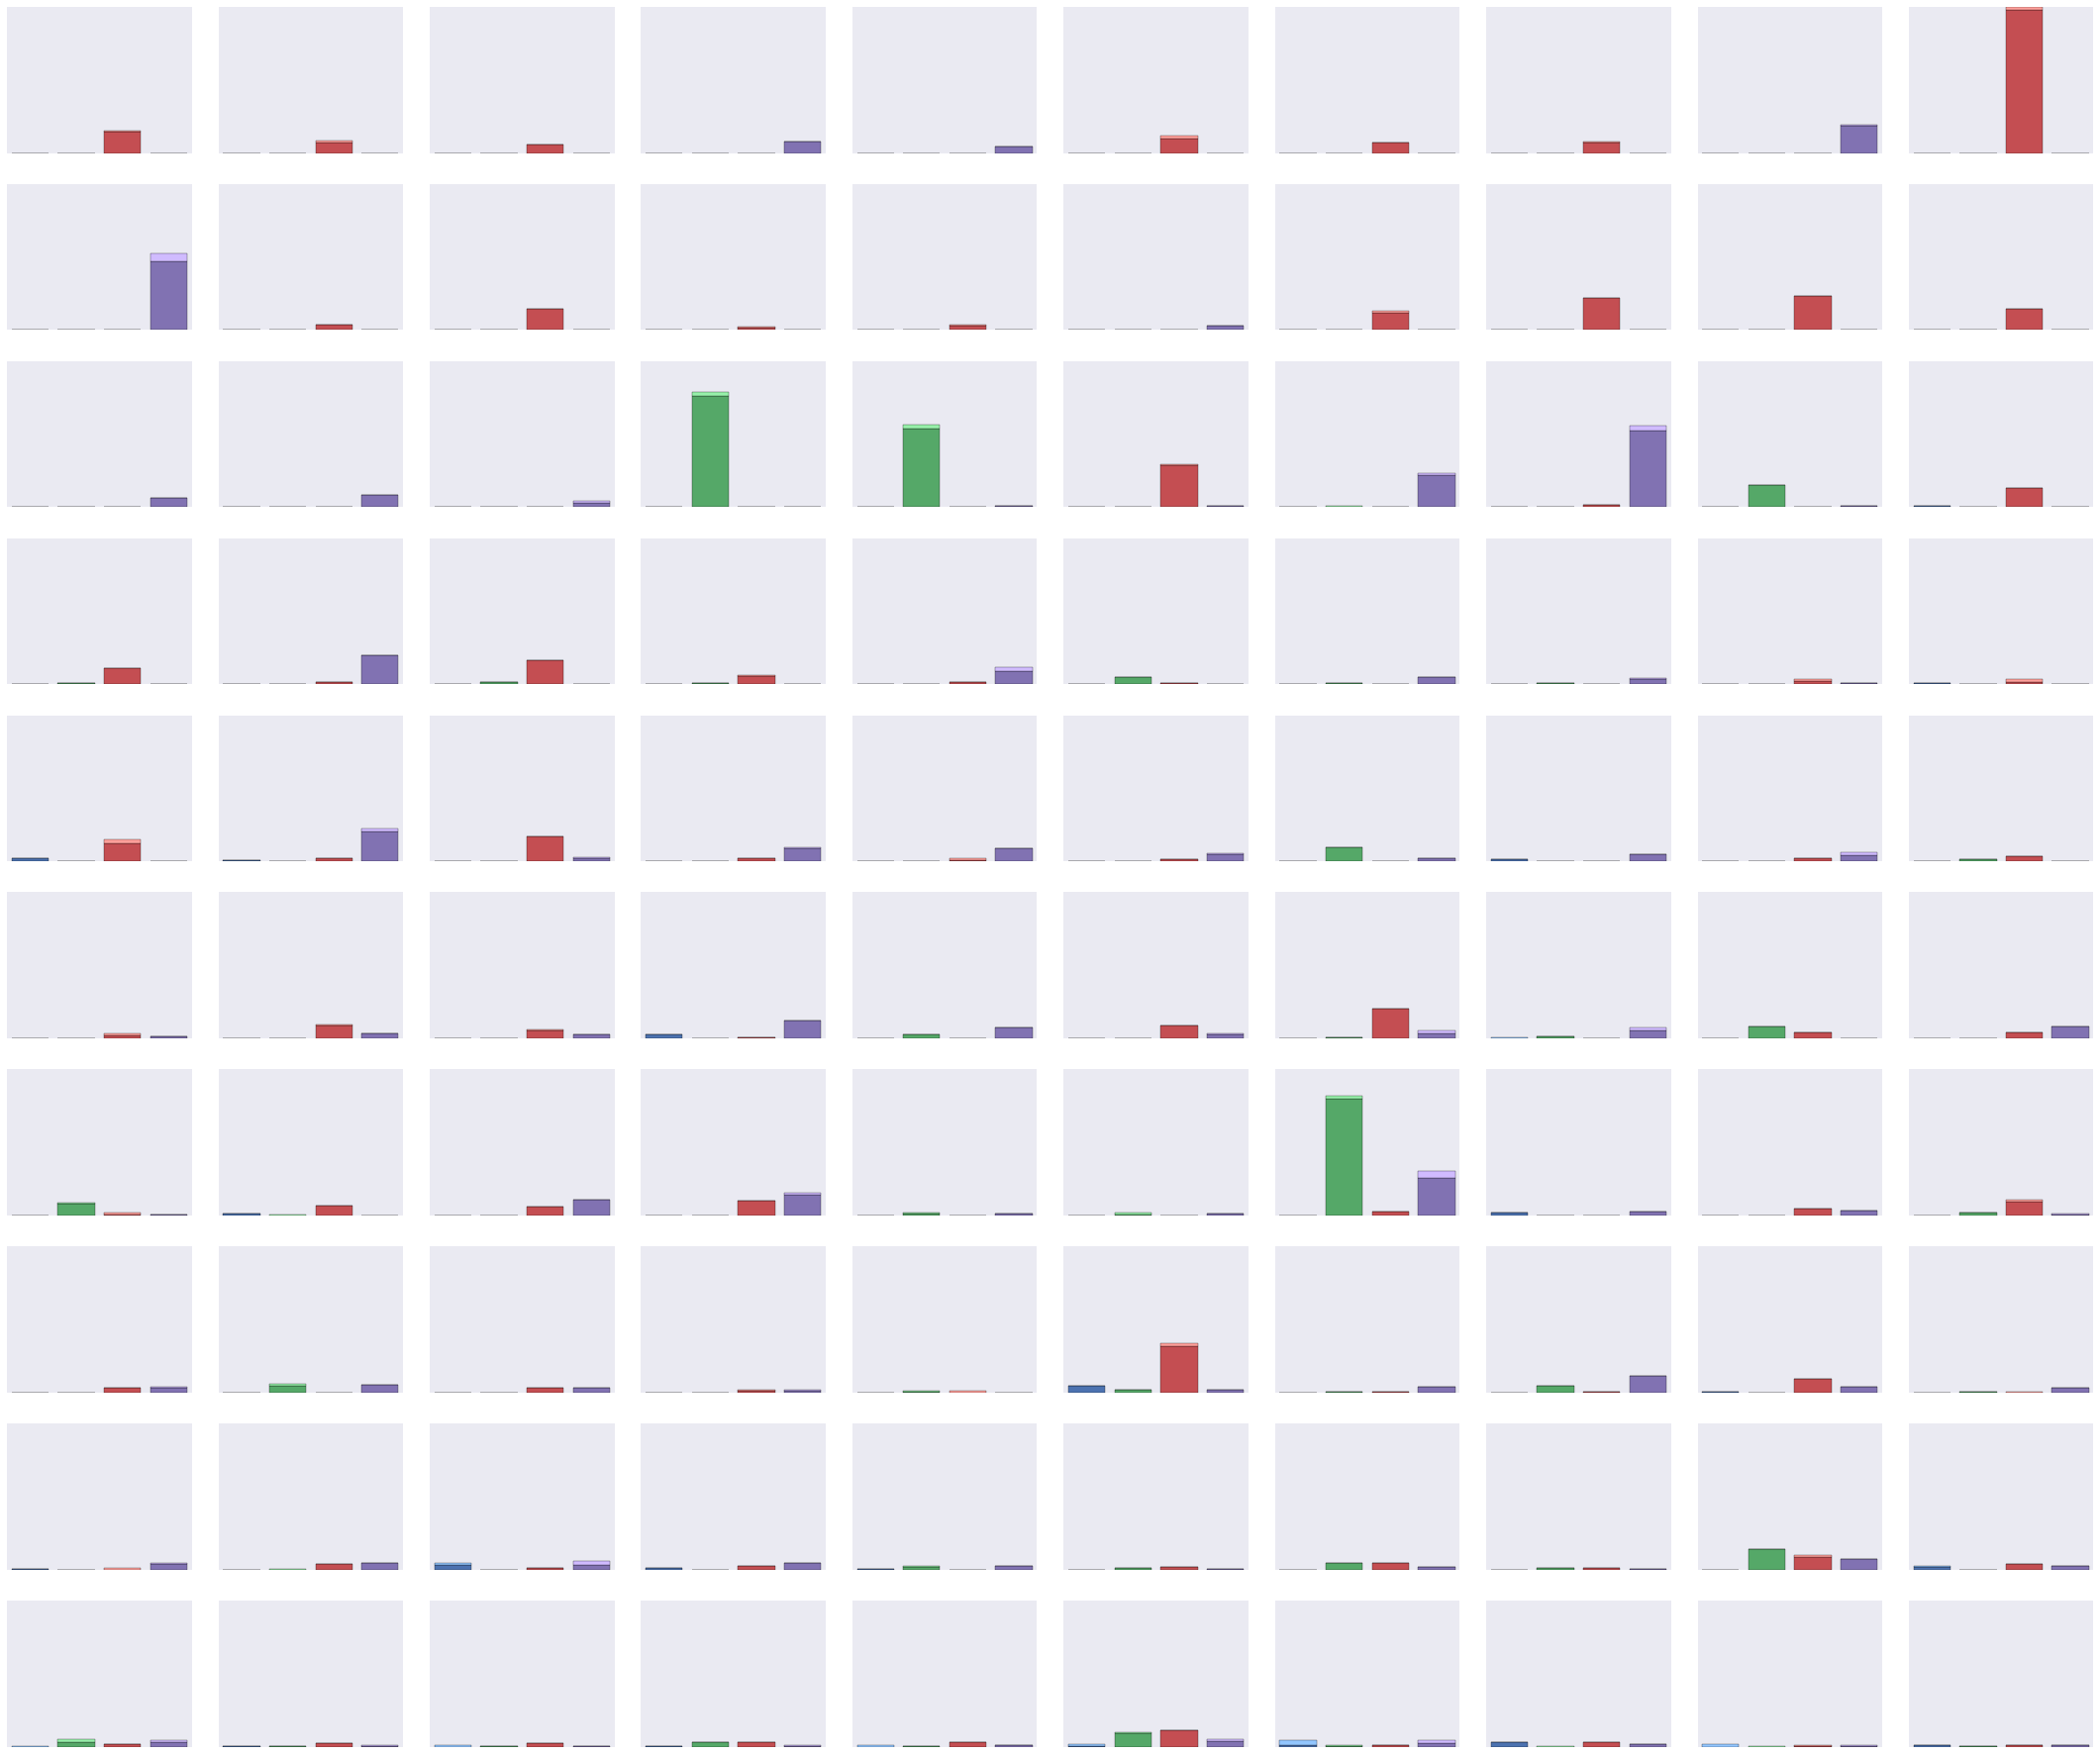

In [15]:
xticks = [0,1,2,3]
feat_colors = sns.color_palette("pastel")
not_feat_colors = sns.color_palette()

f, ax = plt.subplots(10,10,figsize=(30, 25),sharey=True)
f.tight_layout()

for n in range(100):
    i = customer_to_grid(n)[0]
    j = customer_to_grid(n)[1]
    ax[i,j].bar(xticks,yogurt_filter_id_choice_feature_bar(ids_ordered(n),0),align='center',color=not_feat_colors)
    ax[i,j].bar(xticks,yogurt_filter_id_choice_feature_bar(ids_ordered(n),1),align='center',
                bottom=yogurt_filter_id_choice_feature_bar(ids_ordered(n),0),color=feat_colors)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
plt.show()